# Feature Engineering, EDA, and Modeling

In [1]:
# Packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import game level stats for GK and FP
## 2017 and 2020 dropped from project. Inconsistent statistics available for 2017, No all star game in 2020
S22_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S22_GK_stats.csv')
S21_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S21_GK_stats.csv')
S19_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S19_GK_stats.csv')
S18_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S18_GK_stats.csv')
S22_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S22_FP_stats.csv')
S21_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S21_FP_stats.csv')
S19_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S19_FP_stats.csv')
S18_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S18_FP_stats.csv')

In [3]:
GK_stats = pd.concat([S22_GK_stats,S21_GK_stats,S19_GK_stats,S18_GK_stats], ignore_index= True)
# GK_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/GK_stats.csv') # save file
FP_stats = pd.concat([S22_FP_stats,S21_FP_stats,S19_FP_stats,S18_FP_stats], ignore_index= True)
# FP_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/FP_stats.csv') # save file

In [4]:
# Add Captain Indicator (* in start indicates Captain)
FP_stats['Captain'] = 0
FP_stats.loc[FP_stats['Start'] == "Y*", 'Captain'] = 1
GK_stats['Captain'] = 0
GK_stats.loc[GK_stats['Start'] == "Y*", 'Captain'] = 1
# Add Count of Games Played (will be summed in aggregation)
FP_stats['Games_Played'] = 1
GK_stats['Games_Played'] = 1

In [5]:
# Isolate Y/N from start status
FP_stats['Start'] = FP_stats['Start'].str[0]
GK_stats['Start'] = GK_stats['Start'].str[0]
# Convert Start to bool
FP_stats['Start'] = FP_stats['Start'].replace({'Y':1,'N':0})
GK_stats['Start'] = GK_stats['Start'].replace({'Y':1,'N':0})
# Summarize team performance using match result scoring (Teams receive 3 points for a win, 1 for a draw, and 0 for a loss)
FP_stats['Win_Loss_Draw'] = FP_stats['Win_Loss_Draw'].replace({'L':0, 'D':1, 'W':3})
GK_stats['Win_Loss_Draw'] = GK_stats['Win_Loss_Draw'].replace({'L':0, 'D':1, 'W':3})
# Drop stats that occur after All star game 
FP_stats[FP_stats['Before_All_Star'] == True]
GK_stats[GK_stats['Before_All_Star'] == True]

,Unnamed: 0,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,...,Stp%,#OPA,AvgDist,Match Report,fbref_ID,Win_Loss_Draw,Season,Before_All_Star,Captain,Games_Played
0,0,2022-05-22,Sun,MLS,Regular Season,Away,L 1–2,Vancouver,Charlotte,1,...,0.0,0.0,10.4,Match Report,d6aa8848,0,2022,True,0,1
1,1,2022-08-03,Wed,MLS,Regular Season,Home,L 0–1,San Jose,Inter Miami,0,...,NaN,0.0,14.5,Match Report,9110da2b,0,2022,True,0,1
2,2,2022-08-06,Sat,MLS,Regular Season,Away,D 3–3,San Jose,Austin,1,...,0.0,0.0,15.0,Match Report,9110da2b,1,2022,True,0,1
3,3,2022-05-07,Sat,MLS,Regular Season,Away,D 1–1,Portland Timbers,NY Red Bulls,1,...,0.0,0.0,9.8,Match Report,7fd42a85,1,2022,True,0,1
4,4,2022-07-03,Sun,MLS,Regular Season,Away,D 2–2,Portland Timbers,Nashville,1,...,18.2,0.0,6.0,Match Report,7fd42a85,1,2022,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,809,2018-07-07,Sat,MLS,Regular Season,Home,W 3–0,Houston Dynamo,Minnesota Utd,1,...,33.3,0.0,11.7,Match Report,467f09c8,3,2018,True,0,1
3583,810,2018-07-14,Sat,MLS,Regular Season,Away,D 0–0,Houston Dynamo,Colorado Rapids,1,...,20.0,2.0,19.2,Match Report,467f09c8,1,2018,True,0,1
3584,811,2018-07-21,Sat,MLS,Regular Season,Home,D 1–1,Houston Dynamo,FC Dallas,1,...,33.3,0.0,8.8,Match Report,467f09c8,1,2018,True,0,1
3585,812,2018-07-25,Wed,MLS,Regular Season,Home,L 1–3,Houston Dynamo,Philadelphia,1,...,12.5,0.0,12.6,Match Report,467f09c8,0,2018,True,0,1


In [6]:
# Drop fields that are not needed
FP_stats = FP_stats.drop(['Unnamed: 0','Date','Day','Comp','Round','Venue','Result','Squad','Opponent','Pos','Match Report','Before_All_Star'], axis = 1)
GK_stats = GK_stats.drop(['Unnamed: 0','Date','Day','Comp','Round','Venue','Result','Squad','Opponent','Pos','Match Report','Before_All_Star'], axis = 1)

In [7]:
print(FP_stats.columns)
print(GK_stats.columns)

Index(['Start', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
       'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA',
       'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'Prog', 'Carries', 'Prog.1', 'Succ',
       'Att.1', 'fbref_ID', 'Win_Loss_Draw', 'Season', 'Captain',
       'Games_Played'],
      dtype='object')
Index(['Start', 'Min', 'SoTA', 'GA', 'Saves', 'Save%', 'CS', 'PSxG', 'PKatt',
       'PKA', 'PKsv', 'PKm', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%',
       'AvgLen', 'Att.2', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%',
       '#OPA', 'AvgDist', 'fbref_ID', 'Win_Loss_Draw', 'Season', 'Captain',
       'Games_Played'],
      dtype='object')


In [8]:
# Summarize player stats by ID, season, before all star game
## Aggregation dicts (could this be simplified by using tuples?)
    # Should more of the aggregations be mean instead of sum to account for...
FP_aggs = {'Start':'sum', 'Min':'sum', 'Gls':'sum', 'Ast':'sum', 'PK':'sum', 'PKatt':'sum', 'Sh':'sum', 
           'SoT':'sum', 'CrdY':'sum', 'CrdR':'sum', 'Touches':'sum', 'Press':'sum', 'Tkl':'sum', 'Int':'sum', 
           'Blocks':'sum', 'xG':'mean', 'npxG':'mean', 'xA':'mean', 'SCA':'sum', 'GCA':'sum', 'Cmp':'sum', 'Att':'sum', 
           'Cmp%':'mean', 'Prog':'sum', 'Carries':'sum', 'Prog.1':'sum', 'Succ':'sum', 'Att.1':'sum', 'Win_Loss_Draw':'sum', 
           'Captain':'sum', 'Games_Played':'sum'}
GK_aggs = {'Start':'sum', 'Min':'sum', 'SoTA':'sum', 'GA':'sum', 'Saves':'sum', 'Save%':'mean', 'CS':'sum', 'PSxG':'mean', 
           'PKatt':'sum', 'PKA':'sum', 'PKsv':'sum', 'PKm':'sum', 'Cmp':'sum', 'Att':'sum', 'Cmp%':'mean', 'Att.1':'sum', 
           'Thr':'sum', 'Launch%':'mean', 'AvgLen':'mean', 'Att.2':'sum', 'Launch%.1':'mean', 'AvgLen.1':'mean', 'Opp':'sum', 
           'Stp':'sum', 'Stp%':'mean', '#OPA':'sum', 'AvgDist':'mean', 'Win_Loss_Draw':'sum', 'Captain':'sum', 'Games_Played':'sum'}

FP_stats = FP_stats.groupby(['fbref_ID', 'Season']).agg(FP_aggs).reset_index()
GK_stats = GK_stats.groupby(['fbref_ID', 'Season']).agg(GK_aggs).reset_index()

In [9]:
# Add All-Star Indicator
AS_roster = pd.read_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/all_star_rosters.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(AS_roster[['Year','fbref_ID']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID']).rename(columns={'Year':'all_star'})
FP_stats['all_star'] = FP_stats['all_star'].fillna(False).replace([2018,2019,2021,2022],True) 
GK_stats = GK_stats.merge(AS_roster[['Year','fbref_ID']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID']).rename(columns={'Year':'all_star'})
GK_stats['all_star'] = GK_stats['all_star'].fillna(False).replace([2018,2019,2021,2022],True) 

# All-Star in previous season
prev_all_star = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/all_star_rosters_prev.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(prev_all_star[['Year','fbref_ID','prev_as']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID'], suffixes=(None,'_right'))
FP_stats['prev_as']=FP_stats['prev_as'].fillna(0)
FP_stats=FP_stats.drop(columns = 'Year')
GK_stats = GK_stats.merge(prev_all_star[['Year','fbref_ID','prev_as']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID'], suffixes=(None,'_right'))
GK_stats['prev_as']=GK_stats['prev_as'].fillna(0)
GK_stats=GK_stats.drop(columns = 'Year')

In [10]:
# Rename Features to useful names
FP_name_dict = {'fbref_ID':'fbref_ID', 'Season':'Season','Start':'Count_Starts', 'Min':'Minutes_Played', 'Gls':'Goals', 'Ast':'Assists', 
                'PK':'Penalty_Kick_Success', 'PKatt':'Penalty_Kick_Attempts', 'Sh':'Shots', 'SoT':'Shot_on_Target', 'CrdY':'Yellow_Card', 
                'CrdR':'Red_Card', 'Touches':'Touches', 'Press':'Press', 'Tkl':'Tackles', 'Int':'Interceptions', 'Blocks':'Blocks', 'xG':'Exp_Goals', 
                'npxG':'Expect_None_PK_Goal', 'xA':'Expect_Assist', 'SCA':'Shot_Create_Action', 'GCA':'Goal_Create_Action', 'Cmp':'Complete_Passes', 
                'Att':'Attempt_Passes', 'Cmp%':'Pass_Complete_Percent', 'Prog':'Progressive_Passes', 'Carries':'Carries', 'Prog.1':'Progressive_Dribble', 
                'Succ':'Success_Dribble', 'Att.1':'Attempt_Dribble', 'Win_Loss_Draw':'Team_Points','Captain':'Captain', 'Games_Played':'Games_Played', 'all_star':'all_star'}
GK_name_dict = {'fbref_ID':'fbref_ID', 'Season':'Season','Start':'Count_Starts', 'Min':'Minutes_Played', 'SoTA':'Shots_on_Target_Attempt', 'GA':'Goals_Against', 
                'Saves':'Saves', 'Save%':'Save%', 'CS':'Clean_Sheet', 'PSxG':'PS_Expect_Goals', 'PKatt':'PK_Attempt', 'PKA':'PK_Goal_Allowed', 'PKsv':'PK_Saved', 
                'PKm':'PK_Missed', 'Cmp':'Pass_Complete_40', 'Att':'Pass_Attempt_40', 'Cmp%':'Pass_Complete_Percent_40', 'Att.1':'Pass_Attempt', 'Thr':'Throws_Attempt', 
                'Launch%':'Pass_over40_Percent', 'AvgLen':'Pass_Distance', 'Att.2':'Goal_Kick_Attempt', 'Launch%.1':'Goal_Kick_Launch_Percent', 'AvgLen.1':'Goal_Kick_Distance',
                'Opp':'Cross_Attempted', 'Stp':'Cross_Stopped', 'Stp%':'Cross_Stop_Percent', '#OPA':'Defensive_Actions', 'AvgDist':'Distance_from_Goal', 
                'Win_Loss_Draw':'Team_Points', 'Captain':'Captain', 'Games_Played':'Games_Played', 'all_star':'all_star'}
FP_stats.rename(columns = FP_name_dict, inplace = True)
GK_stats.rename(columns = GK_name_dict, inplace = True)

# Exploratory Data Analysis

In [11]:
# Address missing data
print(FP_stats.isnull().sum())
print(GK_stats.isnull().sum())
## There are a lot of players who have never attempted a penalty kick, so the % success is null from calculation
FP_stats = FP_stats.fillna(0)
GK_stats = GK_stats.fillna(0)

FP_stats.info()
GK_stats.info()
FP_stats.describe()

fbref_ID                 0
Season                   0
Count_Starts             0
Minutes_Played           0
Goals                    0
Assists                  0
Penalty_Kick_Success     0
Penalty_Kick_Attempts    0
Shots                    0
Shot_on_Target           0
Yellow_Card              0
Red_Card                 0
Touches                  0
Press                    0
Tackles                  0
Interceptions            0
Blocks                   0
Exp_Goals                2
Expect_None_PK_Goal      2
Expect_Assist            2
Shot_Create_Action       0
Goal_Create_Action       0
Complete_Passes          0
Attempt_Passes           0
Pass_Complete_Percent    8
Progressive_Passes       0
Carries                  0
Progressive_Dribble      0
Success_Dribble          0
Attempt_Dribble          0
Team_Points              0
Captain                  0
Games_Played             0
all_star                 0
prev_as                  0
dtype: int64
fbref_ID                    0
Season      

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Success,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,...,Pass_Complete_Percent,Progressive_Passes,Carries,Progressive_Dribble,Success_Dribble,Attempt_Dribble,Team_Points,Captain,Games_Played,prev_as
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,...,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,2020.153631,14.229449,1279.988428,2.067438,1.459697,0.184757,0.234637,18.436951,6.222267,2.671588,...,77.768724,49.653631,532.468875,58.273743,13.357143,22.972466,26.493615,1.290104,19.180367,0.006784
std,1.579289,10.724477,926.157509,3.597937,2.209617,0.780362,0.927735,21.983268,8.596597,2.653865,...,10.349214,50.066373,442.638156,58.493496,16.201419,27.615402,17.575573,5.253650,10.574788,0.091308
min,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019.000000,4.000000,433.500000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,73.318561,10.000000,153.000000,14.000000,2.000000,4.000000,11.000000,0.000000,10.000000,0.000000
50%,2021.000000,13.000000,1191.000000,1.000000,1.000000,0.000000,0.000000,11.000000,3.000000,2.000000,...,79.040517,35.000000,434.500000,40.000000,8.000000,13.000000,26.000000,0.000000,20.000000,0.000000
75%,2022.000000,24.000000,2069.000000,2.000000,2.000000,0.000000,0.000000,24.750000,8.000000,4.000000,...,84.017969,72.000000,823.750000,86.000000,18.000000,32.000000,39.000000,0.000000,28.000000,0.000000
max,2022.000000,39.000000,3420.000000,36.000000,15.000000,9.000000,11.000000,161.000000,64.000000,15.000000,...,100.000000,326.000000,2312.000000,441.000000,135.000000,216.000000,81.000000,37.000000,39.000000,2.000000


In [12]:
# Modify PK features, Captain, % start
FP_stats['PK_Succ'] = (FP_stats['Penalty_Kick_Success']/FP_stats['Penalty_Kick_Attempts'])
FP_stats['Captain_%'] = (FP_stats['Captain']/FP_stats['Games_Played'])
GK_stats['Captain_%'] = (GK_stats['Captain']/GK_stats['Games_Played'])
FP_stats['Start_%'] = (FP_stats['Count_Starts']/FP_stats['Games_Played'])
GK_stats['Start_%'] = (GK_stats['Count_Starts']/GK_stats['Games_Played'])



In [13]:
FP_stats.groupby('all_star').mean()

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Success,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,...,Progressive_Dribble,Success_Dribble,Attempt_Dribble,Team_Points,Captain,Games_Played,prev_as,PK_Succ,Captain_%,Start_%
all_star,,,,,,,,,,,,,,,,,,,,,
False,2020.161826,13.674689,1230.805809,1.831950,1.334855,0.140249,0.178008,17.089627,5.706639,2.587552,...,55.028216,12.475934,21.475104,25.580498,1.06390,18.729876,0.000000,0.732715,0.038805,0.634178
True,2019.947917,28.156250,2514.677083,7.979167,4.593750,1.302083,1.656250,52.260417,19.166667,4.781250,...,139.750000,35.479167,60.562500,49.416667,6.96875,30.489583,0.177083,0.784689,0.225367,0.920527


In [14]:
print(round((len(FP_stats[FP_stats['all_star']==1])/len(FP_stats)*100),2),'% of field players are an all-star each year, averaged across 4 seasons')
print(round((len(GK_stats[GK_stats['all_star']==1])/len(GK_stats)*100),2),'% of goalkeepers are an all-star each, averaged across 4 seasons')
# Target feature is significatly imbalanced in population, will likely need to resample training data

3.83 % of field players are an all-star each year, averaged across 4 seasons
4.89 % of goalkeepers are an all-star each, averaged across 4 seasons


# Normalize data by season

In [15]:
S22_GK_stats = GK_stats[GK_stats['Season'] == 2022]
S21_GK_stats = GK_stats[GK_stats['Season'] == 2021]
S19_GK_stats = GK_stats[GK_stats['Season'] == 2019]
S18_GK_stats = GK_stats[GK_stats['Season'] == 2018]
S22_FP_stats = FP_stats[FP_stats['Season'] == 2022]
S21_FP_stats = FP_stats[FP_stats['Season'] == 2021]
S19_FP_stats = FP_stats[FP_stats['Season'] == 2019]
S18_FP_stats = FP_stats[FP_stats['Season'] == 2018]

In [16]:
def normalize_FP(df):
    result = df.copy()
    for feature_name in df.columns[np.r_[2:33,34:37]]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def normalize_GK(df):
    result = df.copy()
    for feature_name in df.columns[np.r_[2:32,33:35]]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
# Is there a way to normalize by season without needing to split DF by season and then reassemble?

In [17]:
# Normalize all features by each season and FP/GK
S22_GK_stats = normalize_GK(S22_GK_stats)
S21_GK_stats = normalize_GK(S21_GK_stats)
S19_GK_stats = normalize_GK(S19_GK_stats)
S18_GK_stats = normalize_GK(S18_GK_stats)
S22_FP_stats = normalize_FP(S22_FP_stats)
S21_FP_stats = normalize_FP(S21_FP_stats)
S19_FP_stats = normalize_FP(S19_FP_stats)
S18_FP_stats = normalize_FP(S18_FP_stats)

# Join DFs back together
GK_stats = pd.concat([S22_GK_stats,S21_GK_stats,S19_GK_stats,S18_GK_stats], ignore_index= True)
FP_stats = pd.concat([S22_FP_stats,S21_FP_stats,S19_FP_stats,S18_FP_stats], ignore_index= True)

In [18]:
# Add Player details
demo = pd.read_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/player_demographics.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(demo, how = 'left', on = ['Season','fbref_ID'])
GK_stats = GK_stats.merge(demo, how = 'left', on = ['Season','fbref_ID'])

In [19]:
FP_stats.groupby(['Season','Pos'])['Pos'].count()

Season  Pos 
2018    DF      186
        DFFW     12
        DFMF     21
        FW       86
        FWDF      7
        FWMF     78
        MF       98
        MFDF     16
        MFFW     56
2019    DF      197
        DFFW      7
        DFMF     10
        FW       83
        FWDF      8
        FWMF     90
        MF      107
        MFDF     14
        MFFW     58
2021    DF      229
        DFFW     10
        DFMF     18
        FW       96
        FWDF     11
        FWMF    100
        MF      120
        MFDF     14
        MFFW     67
2022    DF      237
        DFFW     15
        DFMF     21
        FW      104
        FWDF      7
        FWMF    108
        MF      156
        MFDF     13
        MFFW     46
Name: Pos, dtype: int64

In [20]:
# Add Model Indicators Based on role
## FP_stats.groupby(['Pos'])['Pos'].count()
FP_stats['DF_model'] = FP_stats['Pos'].str.contains('DF') == True
FP_stats['MF_model'] = FP_stats['Pos'].str.contains('MF') == True
FP_stats['FW_model'] = FP_stats['Pos'].str.contains('FW') == True

In [21]:
FP_stats.groupby(['FW_model','MF_model','DF_model'])['fbref_ID'].count()
# No players fit in all models, but a large number cross into two
# Especially forwards and midfielders. This is expected based on role. Expect to see similar features of importance for both models
# Not considering GK crossover into field player models

FW_model  MF_model  DF_model
False     False     True        849
          True      False       481
                    True        127
True      False     False       369
                    True         77
          True      False       603
Name: fbref_ID, dtype: int64

In [22]:
print(FP_stats.isnull().sum()) # a vast majority of players did not attempt a penalty kick, so there are many nulls
print(GK_stats.isnull().sum())
FP_stats=FP_stats.fillna(0)
GK_stats=GK_stats.fillna(0)

fbref_ID                    0
Season                      0
Count_Starts                0
Minutes_Played              0
Goals                       0
Assists                     0
Penalty_Kick_Success        0
Penalty_Kick_Attempts       0
Shots                       0
Shot_on_Target              0
Yellow_Card                 0
Red_Card                    0
Touches                     0
Press                       0
Tackles                     0
Interceptions               0
Blocks                      0
Exp_Goals                   0
Expect_None_PK_Goal         0
Expect_Assist               0
Shot_Create_Action          0
Goal_Create_Action          0
Complete_Passes             0
Attempt_Passes              0
Pass_Complete_Percent       0
Progressive_Passes          0
Carries                     0
Progressive_Dribble         0
Success_Dribble             0
Attempt_Dribble             0
Team_Points                 0
Captain                     0
Games_Played                0
all_star  

In [23]:
FW = FP_stats[FP_stats['FW_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model', 'Captain', 'Penalty_Kick_Success'], axis = 1)
#FW_KB.columns
#print(FW.isnull().sum())
MF = FP_stats[FP_stats['MF_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model', 'Captain', 'Penalty_Kick_Success'], axis = 1)
DF = FP_stats[FP_stats['DF_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model', 'Captain', 'Penalty_Kick_Success'], axis = 1)
GK = GK_stats.drop(['Nation','Pos', 'Captain', 'Pass_Attempt_40'], axis = 1)

In [24]:
X = FW[FW.columns[~FW.columns.isin(['Player','all_star','fbref_ID'])]]
Y = FW['all_star']

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
30,prev_as,156.406250
32,Captain_%,102.781903
5,Penalty_Kick_Attempts,67.380021
31,PK_Succ,44.319215
3,Goals,42.525906
19,Goal_Create_Action,39.232209
7,Shot_on_Target,34.926953
4,Assists,32.363801
18,Shot_Create_Action,32.248309
6,Shots,30.858436


In [25]:
X = MF[MF.columns[~MF.columns.isin(['Player','all_star','fbref_ID'])]]
Y = MF['all_star']

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
30,prev_as,106.090909
5,Penalty_Kick_Attempts,57.290016
31,PK_Succ,52.670321
19,Goal_Create_Action,29.383333
4,Assists,27.997606
18,Shot_Create_Action,26.509592
3,Goals,23.325512
23,Progressive_Passes,22.665034
24,Carries,19.514236
26,Success_Dribble,19.334059


In [26]:
X = DF[MF.columns[~DF.columns.isin(['Player','all_star','fbref_ID'])]]
Y = DF['all_star']

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
30,prev_as,154.545455
32,Captain_%,18.279267
13,Interceptions,12.158843
1,Count_Starts,11.847231
2,Minutes_Played,11.830290
10,Touches,11.304577
28,Team_Points,11.163974
21,Attempt_Passes,10.816649
20,Complete_Passes,10.289824
24,Carries,9.841291


In [27]:
X = GK[GK.columns[~GK.columns.isin(['Player','all_star','fbref_ID'])]]
Y = GK['all_star']

best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
29,prev_as,5.836364e+01
7,Clean_Sheet,8.655042e+00
27,Team_Points,7.464413e+00
28,Games_Played,5.181136e+00
2,Minutes_Played,5.152470e+00
1,Count_Starts,5.075864e+00
15,Pass_Attempt,4.788279e+00
13,Pass_Complete_40,4.641195e+00
16,Throws_Attempt,4.210989e+00
19,Goal_Kick_Attempt,3.962004e+00


## Initial findings from feature importance
* Season very low on feature importance for all models indicating that normalization and combining seasons does not have a significant impact
* A player's previous status as an all star leads in all models
* Multiple features for penalty kicks/captain, show similar importance (consider dropping some features)

# Modeling

### Algorithms to consider
* Random Forest
* AdaBoost
* XGBoost
* Neural Network
* SVM
* KNN

#### Notes
* Stratify test/train split on all_star
* CVGridSearch for promising models

In [28]:
# Split into Test/Train
fw_train, fw_test, fw_as_train, fw_as_test = train_test_split(FW[FW.columns[~FW.columns.isin(['Player','all_star','fbref_ID'])]], FW['all_star'], test_size=0.25, random_state=1017, stratify=FW['all_star'])
mf_train, mf_test, mf_as_train, mf_as_test = train_test_split(MF[MF.columns[~MF.columns.isin(['Player','all_star','fbref_ID'])]], MF['all_star'], test_size=0.25, random_state=623, stratify=MF['all_star'])
df_train, df_test, df_as_train, df_as_test = train_test_split(DF[DF.columns[~DF.columns.isin(['Player','all_star','fbref_ID'])]], DF['all_star'], test_size=0.25, random_state=225, stratify=DF['all_star'])
gk_train, gk_test, gk_as_train, gk_as_test = train_test_split(GK[GK.columns[~GK.columns.isin(['Player','all_star','fbref_ID'])]], GK['all_star'], test_size=0.25, random_state=511, stratify=GK['all_star'])

In [29]:
# Upsample training data to address imbalance between all-stars and non-all-stars (~20:1 ratio)
# No need to further bootstrap data to increase overall sample size because this represents the full population
from sklearn.utils import resample
fw_resamp = pd.concat([fw_train, fw_as_train], axis = 1)
#fw_resamp['all_star'].value_counts()
## Split by target
fw_resamp_1 = fw_resamp[fw_resamp['all_star'] == 1]
fw_resamp_0 = fw_resamp[fw_resamp['all_star'] == 0]
fw_resamp_1 = resample(fw_resamp_1, replace = True, n_samples = len(fw_resamp_0))
fw_resamp = pd.concat([fw_resamp_0, fw_resamp_1])
print(fw_resamp['all_star'].value_counts())
## Split back into training dfs
fw_as_train = np.ravel(fw_resamp[['all_star']])
fw_train = fw_resamp.loc[:, fw_resamp.columns != 'all_star']

mf_resamp = pd.concat([mf_train, mf_as_train], axis = 1)
#mf_resamp['all_star'].value_counts()
## Split by target
mf_resamp_1 = mf_resamp[mf_resamp['all_star'] == 1]
mf_resamp_0 = mf_resamp[mf_resamp['all_star'] == 0]
mf_resamp_1 = resample(mf_resamp_1, replace = True, n_samples = len(mf_resamp_0))
mf_resamp = pd.concat([mf_resamp_0, mf_resamp_1])
print(mf_resamp['all_star'].value_counts())
## Split back into training dfs
mf_as_train = np.ravel(mf_resamp[['all_star']])
mf_train = mf_resamp.loc[:, mf_resamp.columns != 'all_star']

df_resamp = pd.concat([df_train, df_as_train], axis = 1)
#df_resamp['all_star'].value_counts()
## Split by target
df_resamp_1 = df_resamp[df_resamp['all_star'] == 1]
df_resamp_0 = df_resamp[df_resamp['all_star'] == 0]
df_resamp_1 = resample(df_resamp_1, replace = True, n_samples = len(df_resamp_0))
df_resamp = pd.concat([df_resamp_0, df_resamp_1])
print(df_resamp['all_star'].value_counts())
## Split back into training dfs
df_as_train = np.ravel(df_resamp[['all_star']])
df_train = df_resamp.loc[:, df_resamp.columns != 'all_star']

gk_resamp = pd.concat([gk_train, gk_as_train], axis = 1)
#gk_resamp['all_star'].value_counts()
## Split by target
gk_resamp_1 = gk_resamp[gk_resamp['all_star'] == 1]
gk_resamp_0 = gk_resamp[gk_resamp['all_star'] == 0]
gk_resamp_1 = resample(gk_resamp_1, replace = True, n_samples = len(gk_resamp_0))
gk_resamp = pd.concat([gk_resamp_0, gk_resamp_1])
print(gk_resamp['all_star'].value_counts())
## Split back into training gks
gk_as_train = np.ravel(gk_resamp[['all_star']])
gk_train = gk_resamp.loc[:, gk_resamp.columns != 'all_star']

False    750
True     750
Name: all_star, dtype: int64
False    875
True     875
Name: all_star, dtype: int64
False    764
True     764
Name: all_star, dtype: int64
False    160
True     160
Name: all_star, dtype: int64


In [30]:
# Goal is to optimize models for selecting the most true positives. Prediction of who is an all-star is the priority. Will be used with GridSearchCV
from sklearn.metrics import recall_score, make_scorer, brier_score_loss, fbeta_score
#scorer = make_scorer(fbeta_score, average = 'binary', beta = 20)
scorer = make_scorer(recall_score, average = 'binary')

In [31]:
fw_test.head()

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,Red_Card,...,Progressive_Dribble,Success_Dribble,Attempt_Dribble,Team_Points,Games_Played,prev_as,PK_Succ,Captain_%,Start_%,Age
917,2021,0.555556,0.512883,0.136364,0.307692,0.000000,0.161972,0.157895,0.200000,0.0,...,0.294671,0.381818,0.341709,0.478873,0.722222,0.0,0.0,0.000,0.740741,26
2448,2018,0.769231,0.786195,0.400000,0.133333,0.000000,0.422360,0.518519,0.142857,0.0,...,0.287634,0.074074,0.083333,0.555556,0.789474,0.0,0.0,0.000,0.967742,28
617,2022,0.800000,0.741049,0.500000,0.692308,0.714286,0.459016,0.344828,0.166667,0.0,...,0.360544,0.241071,0.258537,0.955224,0.911765,1.0,0.8,0.875,0.875000,33
1599,2019,0.083333,0.177118,0.055556,0.071429,0.000000,0.089744,0.109375,0.000000,0.0,...,0.071960,0.036364,0.090395,0.346667,0.485714,0.0,0.0,0.000,0.166667,19
1755,2019,0.972222,0.939125,0.472222,0.571429,0.000000,0.730769,0.796875,0.153846,0.0,...,0.746898,0.636364,0.881356,1.000000,1.000000,0.0,0.0,0.000,0.972222,20


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

features = ['Captain_%','PK_Succ','Goals','Goal_Create_Action','Shot_on_Target','Assists']
est = RandomForestClassifier(random_state=511)
param = {'n_estimators': [100,500,1000,2500] , 'max_depth': range(3,8,1), 'criterion':['gini','log_loss']}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose= True)
grid_search.fit(fw_train[features], fw_as_train)
print(grid_search.best_params_)

clf = grid_search.best_estimator_
clf.fit(fw_train[features], fw_as_train)
fw_y_pred = clf.predict(fw_test[features])
print(classification_report(fw_as_test, fw_y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.98      0.91      0.94       251
        True       0.26      0.67      0.37        12

    accuracy                           0.90       263
   macro avg       0.62      0.79      0.66       263
weighted avg       0.95      0.90      0.92       263



In [33]:
clf.fit(fw_train[features], fw_as_train)
fw_y_pred = clf.predict_proba(fw_test[features])
print(fw_as_test.value_counts())
y = pd.Series([i[1] for i in fw_y_pred])
pd.concat([fw_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    251
True      12
Name: all_star, dtype: int64


,all_star,0
88,False,0.976469
15,False,0.947016
11,True,0.940344
2,True,0.937784
47,True,0.927891
19,True,0.915996
4,True,0.911252
181,True,0.904968
142,False,0.894326
193,False,0.848539


In [34]:
features = ['prev_as','Penalty_Kick_Attempts','PK_Succ','Goal_Create_Action','Assists']
est = RandomForestClassifier(random_state=511)
param = {'n_estimators': [100,500,1000,2500] , 'max_depth': range(3,8,1), 'criterion':['gini','log_loss']}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose= True)
grid_search.fit(mf_train[features], mf_as_train)
print(grid_search.best_params_)

clf = grid_search.best_estimator_
clf.fit(mf_train[features], mf_as_train)
mf_y_pred = clf.predict(mf_test[features])
print(classification_report(mf_as_test, mf_y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 500}
              precision    recall  f1-score   support

       False       0.98      0.83      0.90       292
        True       0.11      0.55      0.18        11

    accuracy                           0.82       303
   macro avg       0.54      0.69      0.54       303
weighted avg       0.95      0.82      0.87       303



In [35]:
clf.fit(mf_train[features], mf_as_train)
mf_y_pred = clf.predict_proba(mf_test[features])
print(mf_as_test.value_counts())
y = pd.Series([i[1] for i in mf_y_pred])
pd.concat([mf_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    292
True      11
Name: all_star, dtype: int64


,all_star,0
17,True,0.957377
293,True,0.929691
150,False,0.887525
284,False,0.772453
83,False,0.726891
151,False,0.726478
164,False,0.721316
241,False,0.704729
278,True,0.701194
110,False,0.696290


In [36]:
features = ['prev_as','Captain_%','Interceptions','Count_Starts','Minutes_Played', 'Touches']
est = RandomForestClassifier(random_state=511)
param = {'n_estimators': [100,500,1000,2500] , 'max_depth': range(3,8,1), 'criterion':['gini','log_loss']}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose= True)
grid_search.fit(df_train[features], df_as_train)
print(grid_search.best_params_)

clf = grid_search.best_estimator_
clf.fit(df_train[features], df_as_train)
df_y_pred = clf.predict(df_test[features])
print(classification_report(df_as_test, df_y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       1.00      0.80      0.89       256
        True       0.12      0.88      0.22         8

    accuracy                           0.81       264
   macro avg       0.56      0.84      0.55       264
weighted avg       0.97      0.81      0.87       264



In [37]:
clf.fit(df_train[features], df_as_train)
df_y_pred = clf.predict_proba(df_test[features])
print(df_as_test.value_counts())
y = pd.Series([i[1] for i in df_y_pred])
pd.concat([df_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    256
True       8
Name: all_star, dtype: int64


,all_star,0
157,False,0.884477
184,True,0.876774
199,False,0.870002
66,False,0.870002
61,False,0.852181
145,False,0.848154
191,False,0.845788
2,False,0.843080
21,False,0.837372
26,False,0.822976


In [38]:
features = ['prev_as','Clean_Sheet','Team_Points','Games_Played','Minutes_Played']
est = RandomForestClassifier(random_state=511)
param = {'n_estimators': [100,500,1000,2500] , 'max_depth': range(3,8,1), 'criterion':['gini','log_loss']}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose= True)
grid_search.fit(gk_train[features], gk_as_train)
print(grid_search.best_params_)

clf = grid_search.best_estimator_
clf.fit(gk_train[features], gk_as_train)
gk_y_pred = clf.predict(gk_test[features])
print(classification_report(gk_as_test, gk_y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.98      0.81      0.89        54
        True       0.17      0.67      0.27         3

    accuracy                           0.81        57
   macro avg       0.57      0.74      0.58        57
weighted avg       0.94      0.81      0.86        57



In [39]:
clf.fit(gk_train[features], gk_as_train)
gk_y_pred = clf.predict_proba(gk_test[features])
print(gk_as_test.value_counts())
y = pd.Series([i[1] for i in gk_y_pred])
pd.concat([gk_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    54
True      3
Name: all_star, dtype: int64


,all_star,0
15,True,0.939719
37,False,0.823362
10,False,0.787334
17,False,0.760192
2,False,0.696640
47,True,0.691499
49,False,0.687358
24,False,0.680253
23,False,0.638157
19,False,0.632757


### XGBoost

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
## Fowards

est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': [2,4,6,8], 'n_estimators': [100,250,500], 'learning_rate': [0.01,0.25], 'colsample_bytree': [0.1,0.5], 'colsample_bylevel': [0.1,0.5]}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(fw_train, fw_as_train)
print(grid_search.best_params_)

xgb_class = grid_search.best_estimator_
xgb_class.fit(fw_train, fw_as_train)
preds = xgb_class.predict(fw_test)
print(metrics.classification_report(fw_as_test,preds))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[01:49:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bylevel': 0.1, 'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
[01:49:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.99      0.81      0.89       251
        True       0.16      0.75      0.26        12

    accu

In [41]:
xgb_class.fit(fw_train, fw_as_train)
fw_y_pred = xgb_class.predict_proba(fw_test)
print(fw_as_test.value_counts())
y = pd.Series([i[1] for i in fw_y_pred])
pd.concat([fw_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

[01:49:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False    251
True      12
Name: all_star, dtype: int64


,all_star,0
181,True,0.745833
2,True,0.718980
19,True,0.715299
88,False,0.705929
193,False,0.698379
49,False,0.691186
91,False,0.687034
4,True,0.684499
142,False,0.683926
47,True,0.669298


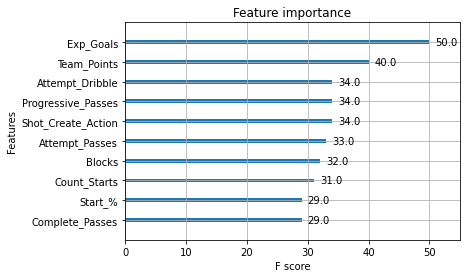

In [42]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.show()

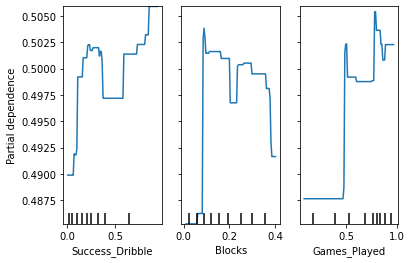

In [43]:
from sklearn.inspection import PartialDependenceDisplay
plot = PartialDependenceDisplay.from_estimator(xgb_class, fw_train, features = ['Success_Dribble','Blocks', 'Games_Played'])

In [44]:
## Midfield

est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': [2,4,6,8], 'n_estimators': [100,250,500], 'learning_rate': [0.01,0.25], 'colsample_bytree': [0.1,0.5], 'colsample_bylevel': [0.1,0.5]}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 3, verbose = True)
grid_search.fit(mf_train, mf_as_train)
print(grid_search.best_params_)

xgb_class = grid_search.best_estimator_
xgb_class.fit(mf_train, mf_as_train)
preds = xgb_class.predict(mf_test)
print(metrics.classification_report(mf_as_test,preds))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[01:49:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bylevel': 0.1, 'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
[01:49:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.98      0.87      0.92       292
        True       0.12      0.45      0.19        11

    accu

In [45]:
xgb_class.fit(mf_train, mf_as_train)
mf_y_pred = xgb_class.predict_proba(mf_test)
print(mf_as_test.value_counts())
y = pd.Series([i[1] for i in mf_y_pred])
pd.concat([mf_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

[01:49:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False    292
True      11
Name: all_star, dtype: int64


,all_star,0
150,False,0.721271
293,True,0.689836
85,False,0.663508
8,False,0.655604
7,False,0.637514
17,True,0.634989
12,False,0.632813
167,False,0.631410
278,True,0.629608
284,False,0.613291


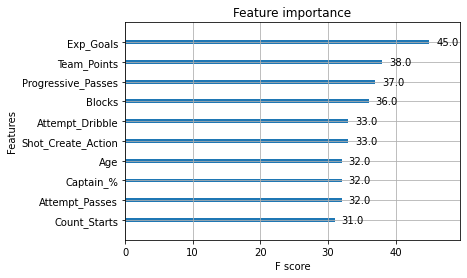

In [46]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.show()

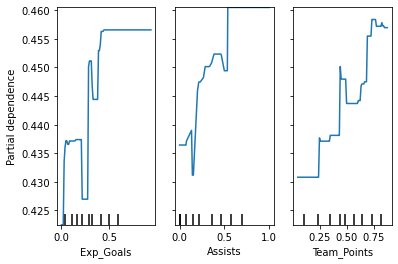

In [47]:
plot = PartialDependenceDisplay.from_estimator(xgb_class, fw_train, features = ['Exp_Goals','Assists','Team_Points'])

In [48]:
## Defender
features = ['prev_as','Captain_%','Interceptions','Count_Starts','Minutes_Played', 'Touches']
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': [2,4,6,8], 'n_estimators': [100,250,500], 'learning_rate': [0.01,0.25], 'colsample_bytree': [0.1,0.5], 'colsample_bylevel': [0.1,0.5]}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 3, verbose = True)
grid_search.fit(df_train[features], df_as_train)
print(grid_search.best_params_)

xgb_class = grid_search.best_estimator_
xgb_class.fit(df_train[features], df_as_train)
preds = xgb_class.predict(df_test[features])
print(metrics.classification_report(df_as_test,preds))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[01:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bylevel': 0.1, 'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250}
[01:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.99      0.82      0.90       256
        True       0.12      0.75      0.20         8

    accu

In [49]:
xgb_class.fit(df_train[features], df_as_train)
df_y_pred = xgb_class.predict_proba(df_test[features])
print(df_as_test.value_counts())
y = pd.Series([i[1] for i in df_y_pred])
pd.concat([df_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

[01:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False    256
True       8
Name: all_star, dtype: int64


,all_star,0
59,True,0.880112
199,False,0.801589
136,False,0.756107
5,False,0.745180
2,False,0.734019
7,True,0.723777
221,False,0.712387
26,False,0.695721
151,False,0.694671
132,False,0.688352


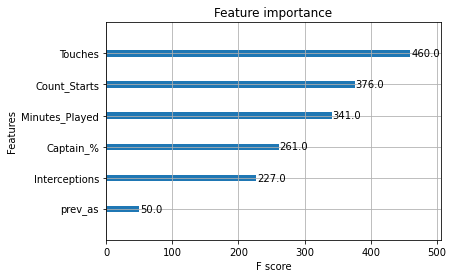

In [50]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.show()

In [52]:
## Goalkeepers
features = ['prev_as','Clean_Sheet','Team_Points','Games_Played','Minutes_Played']
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': [2,4,6,8], 'n_estimators': [100,250,500], 'learning_rate': [0.01,0.25], 'colsample_bytree': [0.1,0.5], 'colsample_bylevel': [0.1,0.5]}
grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = scorer, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(gk_train[features], gk_as_train)
print(grid_search.best_params_)

xgb_class = grid_search.best_estimator_
xgb_class.fit(gk_train[features], gk_as_train)
preds = xgb_class.predict(gk_test[features])
print(metrics.classification_report(gk_as_test,preds))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[01:58:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bylevel': 0.1, 'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
[01:58:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       1.00      0.70      0.83        54
        True       0.16      1.00      0.27         3

    accu

In [53]:
xgb_class.fit(gk_train[features], gk_as_train)
gk_y_pred = xgb_class.predict_proba(gk_test[features])
print(gk_as_test.value_counts())
y = pd.Series([i[1] for i in gk_y_pred])
pd.concat([gk_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

[01:58:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False    54
True      3
Name: all_star, dtype: int64


,all_star,0
15,True,0.696309
17,False,0.637918
2,False,0.605422
47,True,0.605422
24,False,0.605422
49,False,0.605422
37,False,0.596901
42,True,0.591717
30,False,0.591717
10,False,0.572528


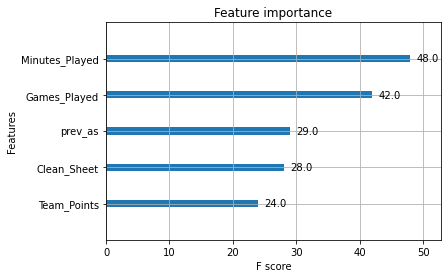

In [54]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.show()

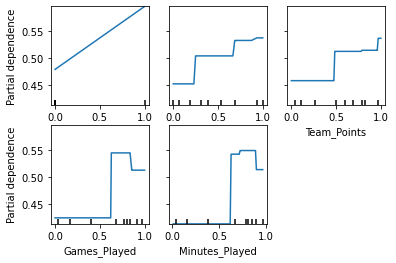

In [57]:
plot = PartialDependenceDisplay.from_estimator(xgb_class, gk_train[features], features = features)

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

est = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,5,8], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(fw_train, fw_as_train)
print(grid_search.best_params_)

knn_class = grid_search.best_estimator_
knn_class.fit(fw_train, fw_as_train)
preds = knn_class.predict(fw_test)
print(metrics.classification_report(fw_as_test,preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

       False       0.97      0.96      0.97       251
        True       0.31      0.33      0.32        12

    accuracy                           0.94       263
   macro avg       0.64      0.65      0.64       263
weighted avg       0.94      0.94      0.94       263



In [59]:
knn_class.fit(fw_train, fw_as_train)
fw_y_pred = knn_class.predict_proba(fw_test)
print(fw_as_test.value_counts())
y = pd.Series([i[1] for i in fw_y_pred])
pd.concat([fw_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    251
True      12
Name: all_star, dtype: int64


,all_star,0
11,True,1.0
174,False,1.0
19,True,1.0
91,False,1.0
47,True,1.0
29,False,1.0
188,False,1.0
88,False,1.0
214,True,1.0
129,False,1.0


In [60]:
est = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,5,8], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(mf_train, mf_as_train)
print(grid_search.best_params_)

knn_class = grid_search.best_estimator_
knn_class.fit(mf_train, mf_as_train)
preds = knn_class.predict(mf_test)
print(metrics.classification_report(mf_as_test,preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       292
        True       0.20      0.09      0.13        11

    accuracy                           0.95       303
   macro avg       0.58      0.54      0.55       303
weighted avg       0.94      0.95      0.95       303



In [61]:
knn_class.fit(mf_train, mf_as_train)
mf_y_pred = knn_class.predict_proba(mf_test)
print(mf_as_test.value_counts())
y = pd.Series([i[1] for i in mf_y_pred])
pd.concat([mf_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    292
True      11
Name: all_star, dtype: int64


,all_star,0
200,False,1.0
19,False,1.0
150,False,1.0
25,True,1.0
90,False,1.0
201,False,0.0
206,False,0.0
205,False,0.0
204,False,0.0
203,False,0.0


In [62]:
est = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,5,8], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(df_train, df_as_train)
print(grid_search.best_params_)

knn_class = grid_search.best_estimator_
knn_class.fit(df_train, df_as_train)
preds = knn_class.predict(df_test)
print(metrics.classification_report(df_as_test,preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       256
        True       0.00      0.00      0.00         8

    accuracy                           0.94       264
   macro avg       0.48      0.49      0.49       264
weighted avg       0.94      0.94      0.94       264



In [63]:
knn_class.fit(df_train, df_as_train)
df_y_pred = knn_class.predict_proba(df_test)
print(df_as_test.value_counts())
y = pd.Series([i[1] for i in df_y_pred])
pd.concat([df_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    256
True       8
Name: all_star, dtype: int64


,all_star,0
137,False,1.0
54,False,1.0
94,False,1.0
87,False,1.0
141,False,1.0
203,False,1.0
240,False,1.0
0,False,0.0
177,False,0.0
179,True,0.0


In [64]:
est = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,5,8], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(gk_train, gk_as_train)
print(grid_search.best_params_)

knn_class = grid_search.best_estimator_
knn_class.fit(gk_train, gk_as_train)
preds = knn_class.predict(gk_test)
print(metrics.classification_report(gk_as_test,preds))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

       False       0.94      0.93      0.93        54
        True       0.00      0.00      0.00         3

    accuracy                           0.88        57
   macro avg       0.47      0.46      0.47        57
weighted avg       0.89      0.88      0.89        57



In [65]:
knn_class.fit(gk_train, gk_as_train)
gk_y_pred = knn_class.predict_proba(gk_test)
print(df_as_test.value_counts())
y = pd.Series([i[1] for i in gk_y_pred])
pd.concat([gk_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    256
True       8
Name: all_star, dtype: int64


,all_star,0
17,False,1.0
2,False,1.0
12,False,1.0
13,False,1.0
0,False,0.0
33,False,0.0
34,False,0.0
35,False,0.0
36,False,0.0
37,False,0.0


## Logistic

In [66]:
from sklearn.linear_model import LogisticRegression

features = ['Captain_%','PK_Succ','Goals','Goal_Create_Action','Shot_on_Target','Assists']
est = LogisticRegression()
param = {"C":[1,3,5,7], "penalty":["l1","l2"]}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(fw_train[features], fw_as_train)
print(grid_search.best_params_)

logi_class = grid_search.best_estimator_
logi_class.fit(fw_train[features], fw_as_train)
preds = logi_class.predict(fw_test[features])
print(metrics.classification_report(fw_as_test,preds))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 7, 'penalty': 'l2'}
              precision    recall  f1-score   support

       False       1.00      0.83      0.91       251
        True       0.21      0.92      0.34        12

    accuracy                           0.84       263
   macro avg       0.60      0.87      0.62       263
weighted avg       0.96      0.84      0.88       263



In [67]:
logi_class.fit(fw_train[features], fw_as_train)
fw_y_pred = logi_class.predict_proba(fw_test[features])
print(fw_as_test.value_counts())
y = pd.Series([i[1] for i in fw_y_pred])
pd.concat([fw_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    251
True      12
Name: all_star, dtype: int64


,all_star,0
19,True,0.996603
88,False,0.994154
181,True,0.993140
2,True,0.992821
193,False,0.989986
142,False,0.982812
47,True,0.977884
11,True,0.954560
15,False,0.954521
168,False,0.946688


['Captain_%', 'PK_Succ', 'Goals', 'Goal_Create_Action', 'Shot_on_Target', 'Assists']


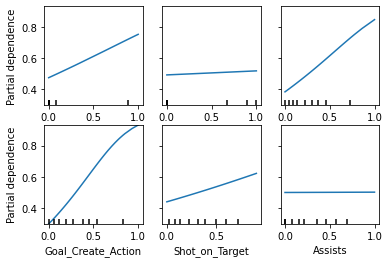

In [68]:
print(features)
plot = PartialDependenceDisplay.from_estimator(logi_class, fw_train[features], features = features, feature_names= features)

In [69]:
features = ['prev_as','Penalty_Kick_Attempts','PK_Succ','Goal_Create_Action','Assists']
est = LogisticRegression()
param = {"C":[1,3,5,7,10,15], "penalty":["l1","l2"]}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(mf_train[features], mf_as_train)
print(grid_search.best_params_)

logi_class = grid_search.best_estimator_
logi_class.fit(mf_train[features], mf_as_train)
preds = logi_class.predict(mf_test[features])
print(metrics.classification_report(mf_as_test,preds))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

       False       0.98      0.84      0.90       292
        True       0.11      0.55      0.19        11

    accuracy                           0.83       303
   macro avg       0.55      0.69      0.55       303
weighted avg       0.95      0.83      0.88       303



In [70]:
logi_class.fit(mf_train[features], mf_as_train)
mf_y_pred = logi_class.predict_proba(mf_test[features])
print(mf_as_test.value_counts())
y = pd.Series([i[1] for i in mf_y_pred])
pd.concat([mf_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    292
True      11
Name: all_star, dtype: int64


,all_star,0
17,True,0.999979
293,True,0.998569
168,True,0.997329
25,True,0.967948
150,False,0.964209
278,True,0.940668
284,False,0.932038
10,False,0.915135
164,False,0.907304
90,False,0.889660


['prev_as', 'Penalty_Kick_Attempts', 'PK_Succ', 'Goal_Create_Action', 'Assists']


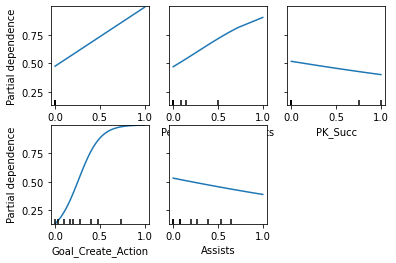

In [71]:
print(features)
plot = PartialDependenceDisplay.from_estimator(logi_class, mf_train[features], features = features, feature_names= features)

In [72]:
features = ['prev_as','Captain_%','Interceptions','Count_Starts','Minutes_Played', 'Touches']
est = LogisticRegression()
param = {"C":[1,3,5,7,10,15], "penalty":["l1","l2"]}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(df_train[features], df_as_train)
print(grid_search.best_params_)

logi_class = grid_search.best_estimator_
logi_class.fit(df_train[features], df_as_train)
preds = logi_class.predict(df_test[features])
print(metrics.classification_report(df_as_test,preds))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

       False       1.00      0.77      0.87       256
        True       0.12      1.00      0.21         8

    accuracy                           0.77       264
   macro avg       0.56      0.88      0.54       264
weighted avg       0.97      0.77      0.85       264



In [73]:
logi_class.fit(df_train[features], df_as_train)
df_y_pred = logi_class.predict_proba(df_test[features])
print(df_as_test.value_counts())
y = pd.Series([i[1] for i in df_y_pred])
pd.concat([df_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    256
True       8
Name: all_star, dtype: int64


,all_star,0
184,True,0.999552
136,False,0.968411
62,False,0.955250
137,False,0.949836
7,True,0.949336
175,False,0.939433
132,False,0.938843
203,False,0.910554
61,False,0.907515
186,False,0.896113


['prev_as', 'Captain_%', 'Interceptions', 'Count_Starts', 'Minutes_Played', 'Touches']


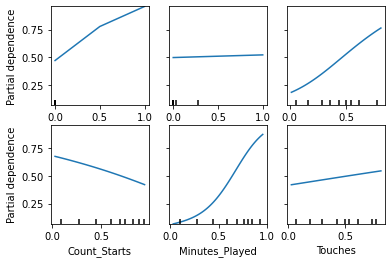

In [74]:
print(features)
plot = PartialDependenceDisplay.from_estimator(logi_class, df_train[features], features = features, feature_names= features)

In [75]:
features = ['prev_as','Clean_Sheet','Team_Points','Games_Played','Minutes_Played']
est = LogisticRegression()
param = {"C":[1,3,5,7], "penalty":["l1","l2"]}
grid_search = GridSearchCV(estimator = est, param_grid = param, n_jobs = -1, cv = 5, verbose = True)
grid_search.fit(gk_train[features], gk_as_train)
print(grid_search.best_params_)

logi_class = grid_search.best_estimator_
logi_class.fit(gk_train[features], gk_as_train)
preds = logi_class.predict(gk_test[features])
print(metrics.classification_report(gk_as_test,preds))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 7, 'penalty': 'l2'}
              precision    recall  f1-score   support

       False       1.00      0.78      0.88        54
        True       0.20      1.00      0.33         3

    accuracy                           0.79        57
   macro avg       0.60      0.89      0.60        57
weighted avg       0.96      0.79      0.85        57



In [76]:
logi_class.fit(gk_train[features], gk_as_train)
gk_y_pred = logi_class.predict_proba(gk_test[features])
print(gk_as_test.value_counts())
y = pd.Series([i[1] for i in gk_y_pred])
pd.concat([gk_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

False    54
True      3
Name: all_star, dtype: int64


,all_star,0
15,True,0.995474
37,False,0.920377
30,False,0.909471
42,True,0.908089
10,False,0.828387
19,False,0.813717
17,False,0.789198
5,False,0.704583
47,True,0.684402
22,False,0.644945


# Unused Models

### AdaBoost
*XGBoost selected due to more tuning parameters*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=1000, learning_rate=1)
pprint(ab.get_params())

In [ ]:
ab_model = ab.fit(fw_train, fw_as_train)
y_pred = ab.predict(fw_test)
print(metrics.classification_report(fw_as_test, y_pred))

ab_model = ab.fit(mf_train, mf_as_train)
y_pred = ab.predict(mf_test)
print(metrics.classification_report(mf_as_test, y_pred))

ab_model = ab.fit(df_train, df_as_train)
y_pred = ab.predict(df_test)
print(metrics.classification_report(df_as_test, y_pred))

ab_model = ab.fit(gk_train, gk_as_train)
y_pred = ab.predict(gk_test)
print(metrics.classification_report(gk_as_test, y_pred))

### Neural Network
*Model is too small for NN to be effective and pick up on subtle interactions*

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs')

pprint(clf.get_params())

In [ ]:
clf.fit(fw_train, fw_as_train)
y_pred = clf.predict(fw_test)
print('NN FW Accuracy:',metrics.f1_score(fw_as_test, y_pred))

clf.fit(mf_train, mf_as_train)
y_pred = clf.predict(mf_test)
print('NN MF Accuracy:',metrics.f1_score(mf_as_test, y_pred))

clf.fit(df_train, df_as_train)
y_pred = clf.predict(df_test)
print('NN DF Accuracy:',metrics.f1_score(df_as_test, y_pred))
# Defender model does not consistently converge

clf.fit(gk_train, gk_as_train)
y_pred = clf.predict(gk_test)
print('NN GK Accuracy:',metrics.f1_score(gk_as_test, y_pred))